In [ ]:
#importing Modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score





In [ ]:
data = pd.read_csv("/content/Housing.csv")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
print("Basic Information about the Data set")
print("no of Rows:" ,len(data))
print("no of column :", len(data.columns))


Basic Information about the Data set
no of Rows: 545
no of column : 13


In [ ]:
print("sample data first 5")
data.head()


sample data first 5


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
print("Last 5 datas")
data.tail()

Last 5 datas


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
data.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
duplicates_before = data.duplicated().sum()
data.drop_duplicates(inplace=True)
if duplicates_before>0:
  print(f"{duplicates_before} were found duplicates")
else:
  print("No Duplicates found")

No Duplicates found


In [ ]:
column_info = data.dtypes
print(column_info)

for col_name , data_type in column_info.items():
  print(f"\n {col_name} : {data_type} \t" ,end='')

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

 price : int64 	
 area : int64 	
 bedrooms : int64 	
 bathrooms : int64 	
 stories : int64 	
 mainroad : object 	
 guestroom : object 	
 basement : object 	
 hotwaterheating : object 	
 airconditioning : object 	
 parking : int64 	
 prefarea : object 	
 furnishingstatus : object 	

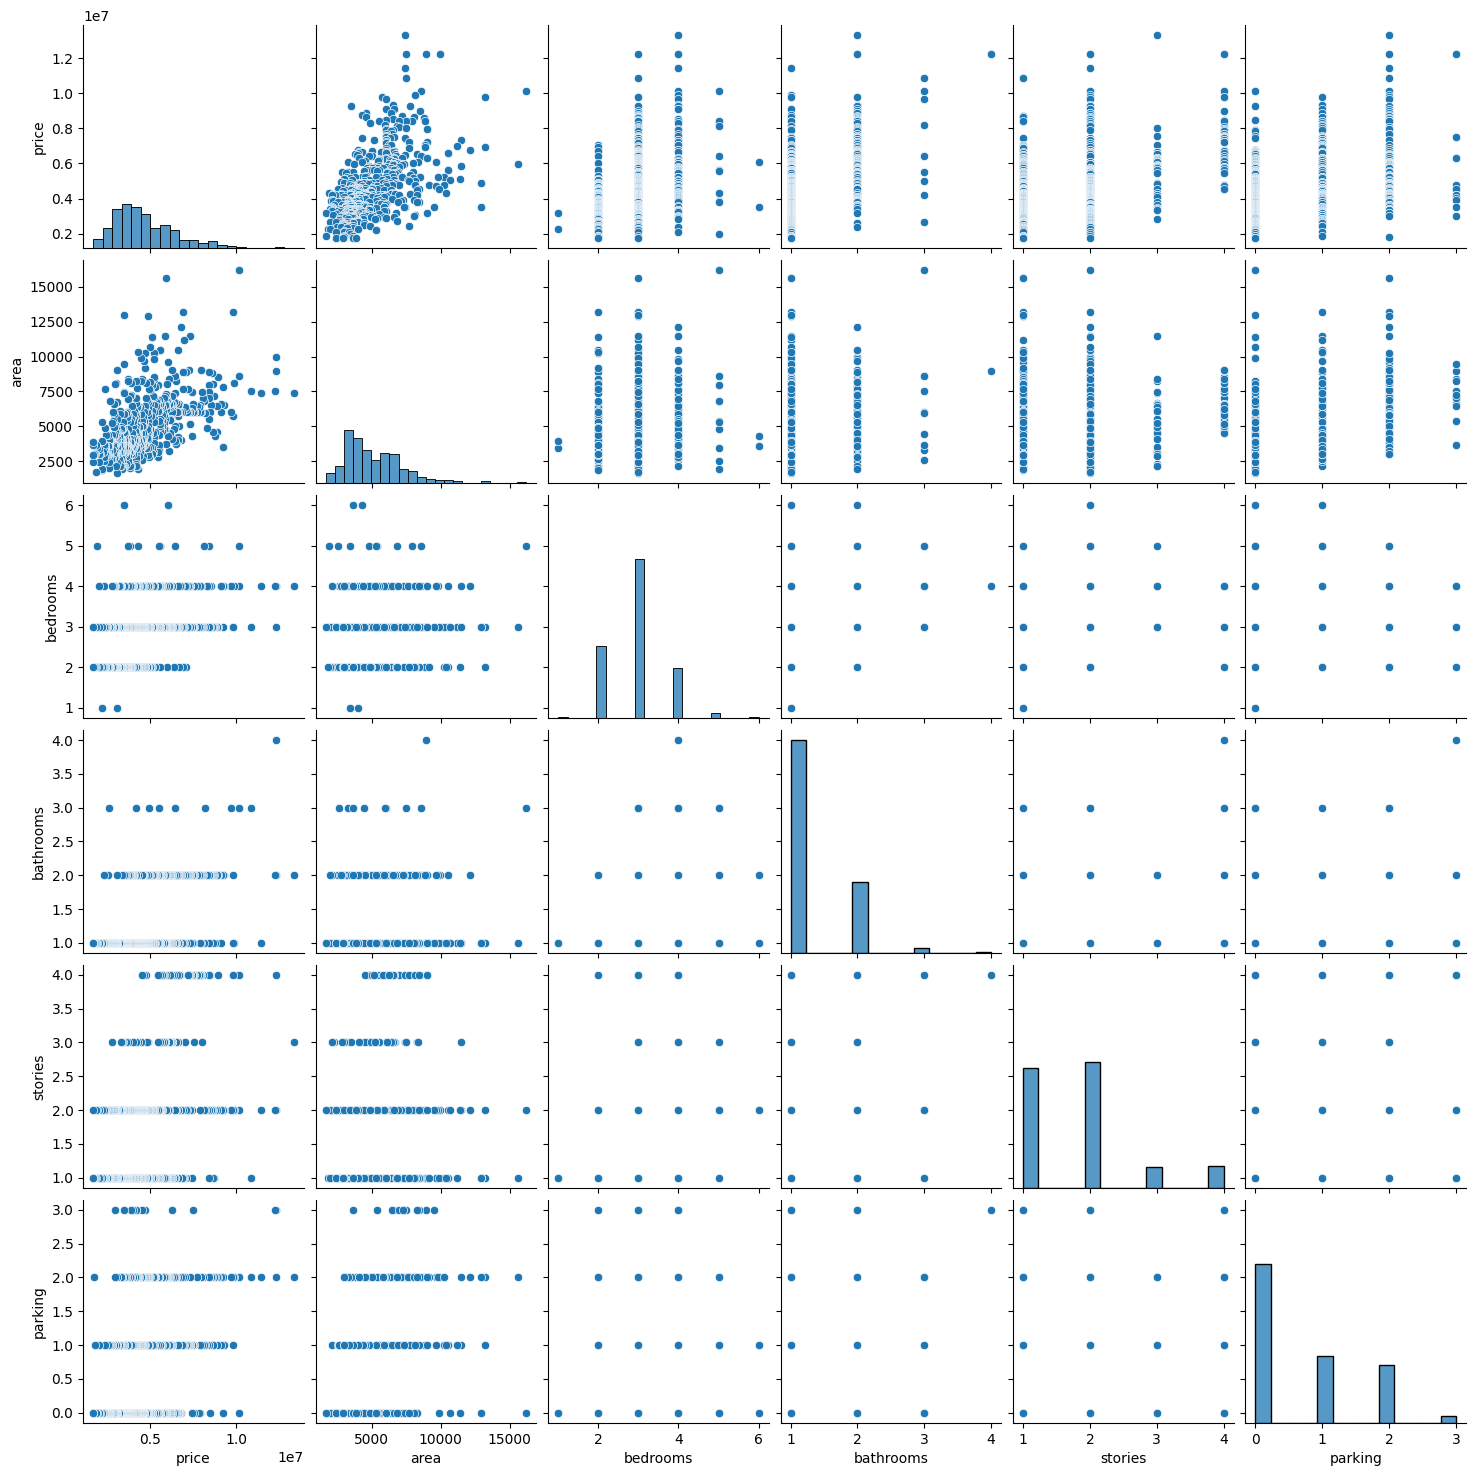

In [ ]:
sns.pairplot(data)

<ipython-input-18-331dd13f2f56>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


<Axes: xlabel='price', ylabel='Density'>

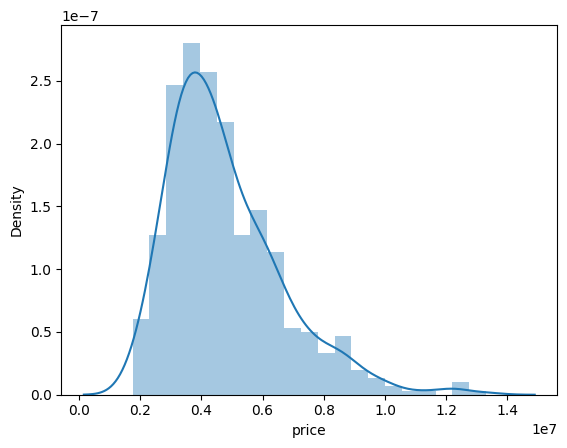

In [ ]:
sns.distplot(data['price'])

<Axes: >

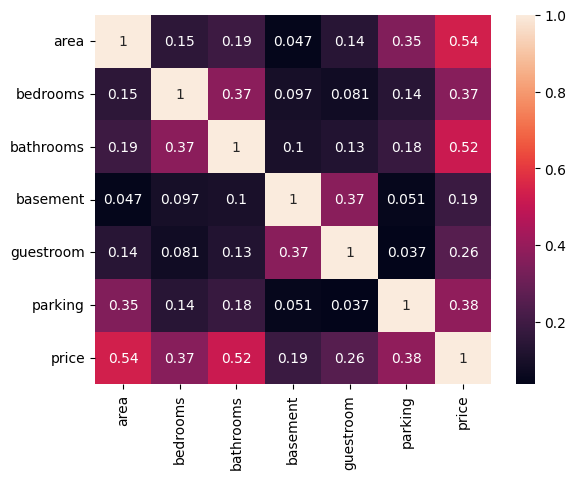

In [ ]:


features = data[['area','bedrooms','bathrooms','basement','guestroom','parking']]
target =data[['price']]
data_subset =pd.concat([features,target], axis=1)

for column in data_subset.columns:
    if data_subset[column].dtype == 'object':
        # Convert categorical text data to numeric
        data_subset[column] = pd.to_numeric(data_subset[column].replace({'no': 0, 'yes': 1}), errors='coerce')

# Drop rows with NaN values created by conversion
data_subset.dropna(inplace=True)
correlation_matrix = data_subset.corr()
sns.heatmap(correlation_matrix,annot=True)

In [ ]:
x = data[['area', 'bedrooms', 'bathrooms', 'basement', 'guestroom', 'parking']]
y = data[['price']]

# Convert categorical columns to numeric
for column in x.columns:
    if x[column].dtype == 'object':  # Check if the column type is object (string)
        x[column] = x[column].replace({'no': 0, 'yes': 1})

# Ensure all data is numeric
x = x.apply(pd.to_numeric, errors='coerce')

# Handle missing values if any (optional, if you expect missing values after conversion)
x.dropna(inplace=True)
y = y.loc[x.index]  # Ensure target variable is aligned with features
X_train , X_test ,y_train ,y_test = train_test_split(x,y ,test_size=0.40, random_state=101)
model =LinearRegression()
model.fit(X_train,y_train)
print(model)
print(model.intercept_)

LinearRegression()
[-154511.28429622]


<ipython-input-34-672a0c299182>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[column] = x[column].replace({'no': 0, 'yes': 1})


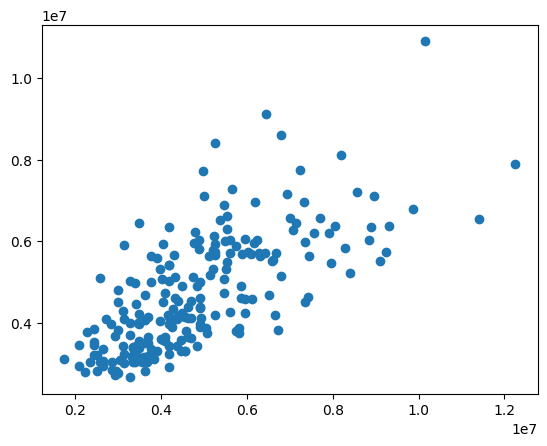

In [ ]:
predictions = model.predict(X_test)
plt.scatter(y_test,predictions)

<ipython-input-39-5f2bc21c0ef7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


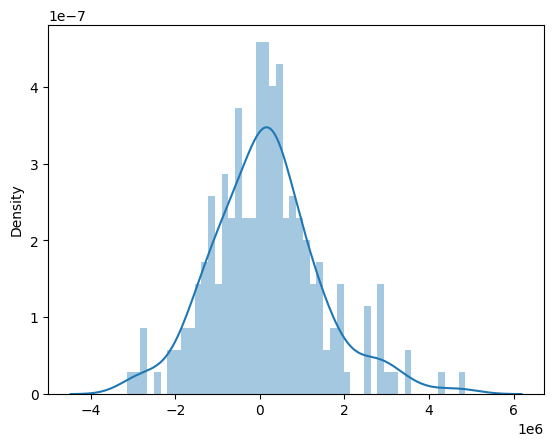

In [ ]:
sns.distplot((y_test-predictions),bins=50);

In [ ]:
y_pred = model.predict(X_test)

# Mean Squared Error and R-squared for model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1699468881815.992
R-squared: 0.48569630528093266


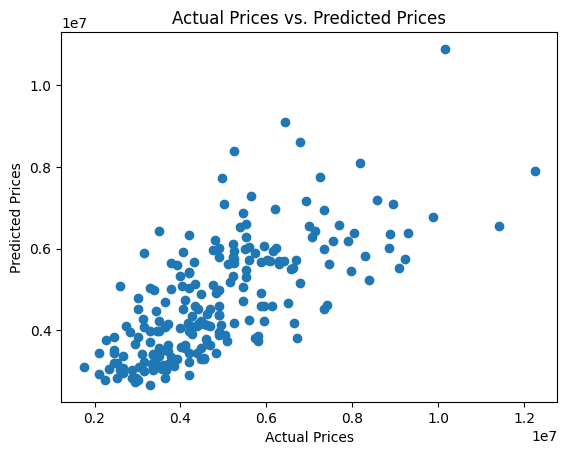

In [ ]:
# Predictions and Visualization
# To visualize the predictions against actual prices, we'll use a scatter plot

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()


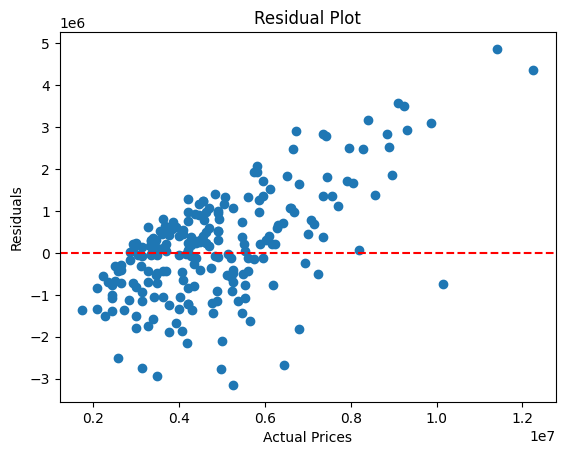

In [ ]:

residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [ ]:
x.sample(5)

,area,bedrooms,bathrooms,basement,guestroom,parking
357,6930,4,1,0,0,1
417,3640,2,1,0,0,0
298,5800,3,1,0,0,2
349,4820,3,1,0,0,0
181,7200,3,1,1,1,1


In [ ]:
new_house = np.array([[7000,3,2,1,1,1]])
predicted_price = model.predict(new_house)
print("Predicted Price:", predicted_price[0])


Predicted Price: [7089897.72074946]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
